# Part I - (Breast Cancer Data Exploration)
## by (Klaus BONOU SELEGBE)


## Table contents
* [Introduction](#intro)
* [Preliminary Wrangling](#wrangling)
    * [Dataset Structure]('data-structure')
* [Univariate Exploration](#uni)
* [Bivariate Exploration](#bi)
* [Multivariate Exploration](#multi)
* [Conclusion](#end)



## Introduction <a class="anchor" id="intro"></a>

*I've decided to choose a different dataset from those presented; and since it's october, the pink month, I focused on a dataset that deals with breast cancer.*


**This dataset provides information about breast cancer patients. It involves patients with breast cancer with invasive ductal and lobular carcinoma (primary SEER cites recodes histology codes NOS 8522/3) diagnosed in 2006-2010.**


*A first data wrangling work has already been done. Indeed, patients with unknown tumor size, examined regional LNs, positive regional LNs, and patients with months of survival less than 1 month were excluded.*

The dataset therefore contains 4024 rows and 16 columns. It was downloaded for this project from kaggle at [Breast Cancer Dataset From Kaggle](https://www.kaggle.com/datasets/reihanenamdari/breast-cancer)


## Preliminary Wrangling <a class="anchor" id="wrangling"></a>


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [12]:
# Dataset loading
breast_cancer_df = pd.read_csv('breast_cancer.csv')

In [3]:
# Printing shape and  columns's info of the dataset
print("Dataset Shape : ",  breast_cancer_df.shape)
print(breast_cancer_df.info())

#Print first 5 lines of the dataset
breast_cancer_df.head(5)

Dataset Shape :  (4024, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
Age                       4024 non-null int64
Race                      4024 non-null object
Marital Status            4024 non-null object
T Stage                   4024 non-null object
N Stage                   4024 non-null object
6th Stage                 4024 non-null object
differentiate             4024 non-null object
Grade                     4024 non-null object
A Stage                   4024 non-null object
Tumor Size                4024 non-null int64
Estrogen Status           4024 non-null object
Progesterone Status       4024 non-null object
Regional Node Examined    4024 non-null int64
Reginol Node Positive     4024 non-null int64
Survival Months           4024 non-null int64
Status                    4024 non-null object
dtypes: int64(5), object(11)
memory usage: 503.1+ KB
None


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
# Print dataset integer column descriptive statistics
breast_cancer_df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


### What is the structure of your dataset? <a class="anchor" id="data-structure"></a>

There are 4024 patients of breast cancer in the dataset with 16 features :

- Numerical features
    - Age : The patient age
    - Tumor size : The size of tumors in millimeters
    - Regional Node Examined
    - Reginol Node Positive
    - Survival Months : Indicates the number of months the patient has survived before healing or dying
    
- Categorical / Ordinal features
    - Race : The origin of the patient( White, black or other races)
    - Marital Status : (Single, Married, Divorced, Widowed or Separated)
    - N stage : Adjusted AJCC 6th N stage which represent the degree of tumor invasion<br>
        (worst) ——> (best) <br>
        N1(1 to 3 lymph nodes), N2(4 to 9 lymph nodes), N3(more tahn 93 lymph nodes)<br>
    - T stage : Adjusted AJCC 6th T stage which represent the relative size of the tumor <br>
        (worst) ——> (best) <br>
        T1(<= 20mm), T2(>= 20mm and <= 50mm), T3(>= 50mm)<br>
    - 6th stage : It's is a combination of the two previous <br>
        (worst) ——> (best) <br>
        IIA, IIB, IIIA, IIIB, IIIC<br>
    - differentiate : It represents how different are cancer cells <br>
        (worst) ——> (best) <br>
        undifferentiated, poorly differentiated, moderately differentiated, well differentiated<br>
    - Grade : It indicates the aggressiveness of tumors <br>
        (worst) ——> (best) <br>
        1(no agressive), 2(little agressive), 3(agressive), 4(very agressive)<br>
    - A stage : Indicate whether the tumor has extended(Regional) or spread to distant parts of the body from the primary tumour (Distant)
    - Estrogen Status : The estrogen status for hormone receptors (Positive or Negative) 
    - Progesterone Status : The progesterone status for hormone receptors (Positive or Negative)
    - Status : It indicates if the patient is alive or dead (Alive, Dead)


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting if the patients is more likely to survive or not ( statut of patient).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that age, tumor size, Survival Months marital status, grade, race, 6th stage, N stage will help support my investigation.

Before explorating the features, let's drop some useless columns for this investigation and change the type of object columns to the right types.

#### Droping useless columns

We already have the tumor size column so the T stage column which is a categorical variable grouping size of tumors in interval is uselsess. The regional node examined and regional node posiitve won't also help me in this investigation.

In [13]:
breast_cancer_df.drop(['Regional Node Examined', 'Reginol Node Positive', 'T Stage '], axis = 1, inplace = True)

#### Refactoring column name and differentiate column value

Some columns name are in lowercase and others in uppercase. There is also space in column name : Let's fix it !

Also differenciate column values has differentiated who is repeated. we will just keep undifferentiated, poorly, moderately or well as values

In [17]:
# Rename column
breast_cancer_df.rename(columns = lambda x : x.strip().lower().replace(" ", "_"), inplace = True)

# Replace " differentiated by ""
breast_cancer_df['differentiate'] = breast_cancer_df['differentiate'].apply(lambda x : x.replace(" differentiated", "").strip())

# Replace " anaplastic; Grade IV" by "4"
breast_cancer_df['grade'] = breast_cancer_df['grade'].apply(lambda x : x.replace(" anaplastic; Grade IV", "4").strip())

In [7]:
breast_cancer_df.sample()

,age,race,marital_status,n_stage,6th_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,survival_months,status
2387,60,White,Single,N1,IIA,Moderately,2,Regional,15,Positive,Positive,66,Alive


#### Let's change object type for categorical variable to category type

In [8]:
'''
    Change the type of column to categorical one with ordered values or not

            Parameters:
                    cols_dict (dict): A dict with column name as key and their values as data
                    ordered (boolean): A boolean to indicate if values have to be oredered or not : set to True by default

            Returns:
                    void
'''
def change_type(cols_dict, ordered= True):
    if ordered :
        for col in cols_dict :
            breast_cancer_df[col] =  breast_cancer_df[col].astype(pd.api.types.CategoricalDtype(categories=cols_dict[col], ordered=True))
    else :
        for col in cols_dict :
            breast_cancer_df[col] =  breast_cancer_df[col].astype('category')


In [20]:
# Categorical columns with their ordered values
ordinal_col = {'n_stage': ['N1','N2','N3'],
                '6th_stage': ['IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC'],
                'differentiate': ['Undifferentiated','Poorly', 'Moderately', 'Well'],
                'grade': ['1', '2', '3', '4']}

# Nominal columns with their values
nominal_col = {'race': ['White','Black','Other'],
                'marital_status': ['Single ', 'Married', 'Divorced', 'Widowed', 'Separated'],
                'a_stage': ['Regional', 'Distant'],
                'estrogen_status': ['Positive', 'Negative'],
                'progesterone_status': ['Positive', 'Negative'],
                'status': ['Alive', 'Dead']}

# The two lines below change the type of categorical columns to the rght types for both nominal and ordinal variables
change_type(ordinal_col)
change_type(nominal_col, ordered= False)

In [21]:
# Let's test if everything went ok
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 13 columns):
age                    4024 non-null int64
race                   4024 non-null category
marital_status         4024 non-null category
n_stage                4024 non-null category
6th_stage              4024 non-null category
differentiate          4024 non-null category
grade                  4024 non-null category
a_stage                4024 non-null category
tumor_size             4024 non-null int64
estrogen_status        4024 non-null category
progesterone_status    4024 non-null category
survival_months        4024 non-null int64
status                 4024 non-null category
dtypes: category(10), int64(3)
memory usage: 135.0 KB


## Univariate Exploration <a class="anchor" id="uni"></a>


### What is the distribution of `status`

Let's take a look of the distribution the status variable. It is a nominal variable. We'll the use countplot to visualize it.

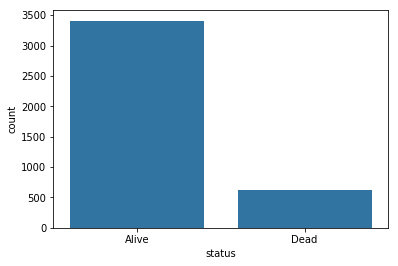

In [23]:
# Defining base_color for having bar with the same volor
base_color = sb.color_palette()[0]

#Plotting
sb.countplot(data = breast_cancer_df, x = 'status', color = base_color);

Having frequencies displayed could enhance the visualizations. Let's re-plot the chart then.

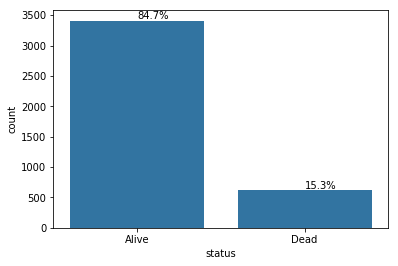

In [24]:
# Value counts for status variable
status_count = breast_cancer_df['status'].value_counts()

# Total number of values
sum_count = breast_cancer_df.shape[0]

#Plotting
sb.countplot(data = breast_cancer_df, x = 'status', color = base_color);

# This loop add the corresponding percent above each bar
for i in range(status_count.shape[0]):
    count = status_count[i]
    percent_str = '{:.1f}%'.format(100*count/sum_count)
    plt.text(i, count+80, percent_str, va='center')

### Observation of `status` variable

We can easily notice that there is more patients alive than dead. Around **85%** of patients of this dataset are alive whereas around **15%** are dead.

No conclusions to make here. The visualization of this variable with others will permit us to have more interesting observations.

### What is the distribution of `age` ,  `tumor_size` of `survival_months`

We will plot the three chart in the same figure as all those variable are numerical one.
Let's take a look of the distribution of these variables using hist plot.

In [25]:
'''
    Draw histplot for precised variables

            Parameters:
                    n_axis (int): Number of axis in which we have to draw histplot
                    cols (list): List of columns for which we have to draw histplot

            Returns:
                    void
'''

def draw_histplot(n_axis, cols):
    for i in range(n_axis):
        axes[i].hist(data=breast_cancer_df, x=cols[i], bins=np.arange(breast_cancer_df[cols[i]].min(), breast_cancer_df[cols[i]].max()+5));
        axes[i].set_xlabel(cols[i]);

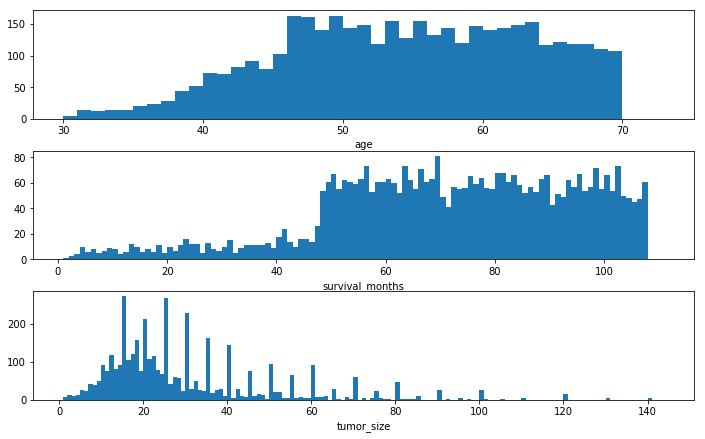

In [26]:
fig, axes = plt.subplots(3, figsize = [10,6])
fig.tight_layout()

draw_histplot(3, ['age', 'survival_months', 'tumor_size'])

#### Transformation on `tumor_size` variable

We notice that for the chart of the variable tumor_size , there are extreme values
Let's investigate further by reducing bins size

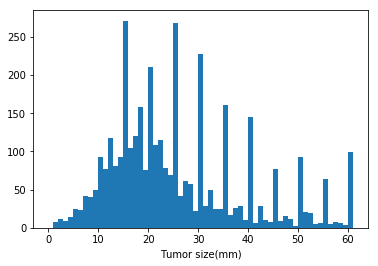

In [27]:
plt.hist(data=breast_cancer_df, x=breast_cancer_df['tumor_size'], bins=np.arange(0, 62));
plt.xlabel("Tumor size(mm)");

### Observation of  `age` ,  `tumor_size` and `survival_months`

* `age` : 
In the case of age, there is a big spike in frequency from the 46 bar. The frequency stays fairly constant dropping a little bit. This surely shows that breast cancer affects many more people aged 45 or over according to this dataset.
* `tumor_size` : 
The tumor_size gives the impression of following a normal law but very high peaks are observed after the largest peak at abscissa 15. The distribution has a long tail on the right with extreme values. The tumor size distribution appears to be roughly bimodal, with a peak at around 15, and a second peak at around 25.

* `survival_months` : 
The survival_months has a left long-tail distribution, with frequency increasing from 49 before remaining constant.
We can say that the most of patients in this dataset survive above of 45 months


### What is the distribution of  remaining nominal variables  `grade`,  `race`, `marital_status`

We will plot the three chart in the same figure as all those variable are categorical one.
We have intentionnaly choosen to not plot other variables because there will be more interesting observations by plotting them with another variables in a bivariate or multivariate visualizations
Let's take now a look of the distribution of these variables using count plot.

In [28]:
'''
    Draw countplot for precised variables

            Parameters:
                    n_axis (int): Number of axis in which we have to draw countplot
                    cols (list): List of columns for which we have to draw countplot

            Returns:
                    void
'''

def draw_countplot(n_axis, cols):
    for i in range(n_axis):
        sb.countplot(data = breast_cancer_df, x = cols[i] , color = base_color, ax=axes[i]);
        if cols[i] == 'marital_status' :
            axes[i].set_xticklabels(labels = ['Divorced', 'Married', 'Separated', 'Single', 'Widowed'], rotation=40);

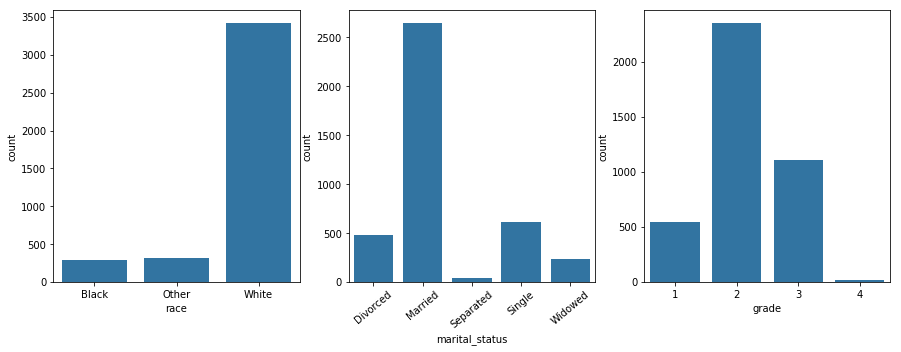

In [29]:
fig, axes = plt.subplots(1,3, figsize=[15,5])
draw_countplot(3, ['race', 'marital_status', 'grade'])

### Observations for variables  `grade`,  `race`, `marital_status`

* `grade` : For the most of patients of this dataset, their carcinogenic cells are mainly a little agressive. An important number has also their carcinogenic cells agressive.
* `race` : The white race dominates this dataset.
* `marital_status` : The patients of this dataset are for the most married. Few ones are single or divorced.

### Discussing about the distribution of my variable of interest. Were there any unusual points? Did I need to perform any transformations?

We can easily notice that there is more patients alive than dead. Around 85% of patients of this dataset are alive whereas around 15% are dead. There is no more conclusions to make here. The visualization of this variable with others will permit us to have more interesting observations. There was not unusual points and I didn't need to perform any transformations because it was not necessary.

### Of the features I've investigated, were there any unusual distributions? Did I perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did I do this?

Of the features I've investigated there were not so much unusual points. I only need to perform a transformation on tumor_size plot because there was some extreme values which make the distribution having a long tail on the right
What could we learn from those visualizations:
   * **age** Breast cancer affects many more people aged 45 or over according to this dataset.
   * **tumor_size** There is more tumor of size 15 or 25 or even 30 millimiters
   * **survival_months** The most of patients in this dataset survive above of 45 months
   * **grade** : For the most of patients of this dataset, their carcinogenic cells are mainly a little agressive. An important number has also their carcinogenic cells agressive.
   * **race** : The white race dominates this dataset.
   * **marital_status** : The patients of this dataset are for the most married. Few ones are single or divorced.

## Bivariate Exploration <a class="anchor" id="bi"></a>

Let's first draw the correlation matrices between the numerical variables for trying to see the variables which have a high coefficient of correlation

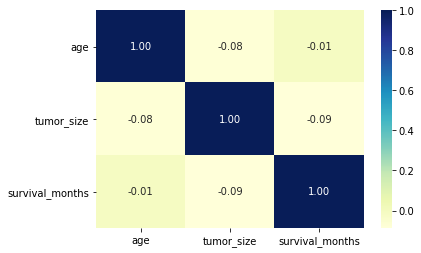

In [30]:
sb.heatmap(breast_cancer_df.corr(), annot=True,cmap="YlGnBu", fmt='.2f');

This visualization allow us to see that there is a weak correlation between numerical variabes.
Specifically there is almost not relation between `age` and `survival_months`. It could be lead us to say that the number of months, patients survive before healing or dying does not depend really of their age.

However even if the coefficient of correlation is near of 0, the fact that it is negative could imply that between `age` and `tumor_size` , the increase of one of these variables lead to the decrease of the second. It's said that the more the tumor size increases, the less the age is, but very slightly since the correlation value is low.

Let's now see if the scatter plot between these variables confirm our observation.

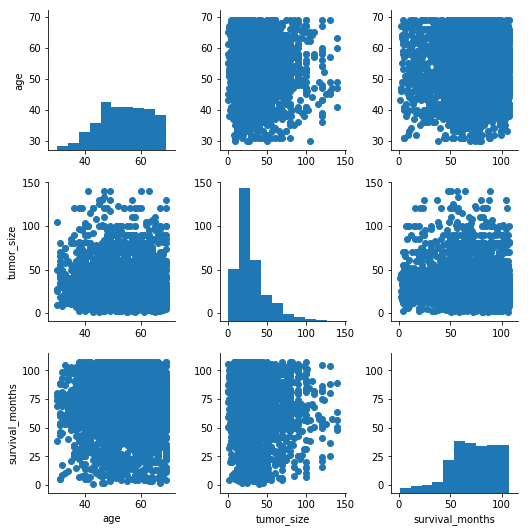

In [31]:
g = sb.PairGrid(data=breast_cancer_df, vars=['age', 'tumor_size', 'survival_months'])
# Defining the type of plot on the diagonal
g.map_diag(plt.hist);

# Defining the type of plot off the diagonal
g.map_offdiag(plt.scatter);

We could easily observe that the values are rather very scattered between them. There is then no meaningful relations between the numerical variables. 

**Let's see the relation they will have with our variable of interest `status`**
A violin chart will be more adapted here once the chart we want to plot is between categorical variable and numerical ones and we are at the step of exploration visualization.

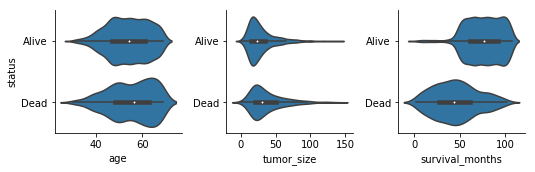

In [32]:
g = sb.PairGrid(data=breast_cancer_df, x_vars=['age', 'tumor_size', 'survival_months'], y_vars='status')
g.map(sb.violinplot);

We can observe that :
* For Alive patients :
    * They are approximately 32 years old to 69
    * Their `tumor_size`  is among the smallest 
    * They survive during a long time at least around 50 months
* For Dead patients :
    * They are rather of all ages
    * Their `tumor_size`  is among the smallest too but not as Alive patients...almost the same range
    * They survive not necessarly a long time before dying.
    

Let's draw a visualization between categorical variables : `status`, `grade`, `differentiate`, `n_stage`, `race`, `marital_status`, `a_stage`, ...

In [33]:
'''
    Draw grouped grouped bar for precised variables

            Parameters:
                    axis_row (int): Number of rows of the axis in which we have to draw the plot
                    axis_col (int): Number of cols of the axis in which we have to draw the plot

                    x_vars (list): List of columns for which we have to draw grouped bar

            Returns:
                    grouped bar
'''

def draw_grouped_bar(axis_row, axis_col, x_vars):
    cpt = 0
    for i in range(axis_row):
        for j in range(axis_col):
            sb.countplot(data = breast_cancer_df, x=x_vars[cpt], hue='status', ax=axes[i,j]);
            cpt +=1

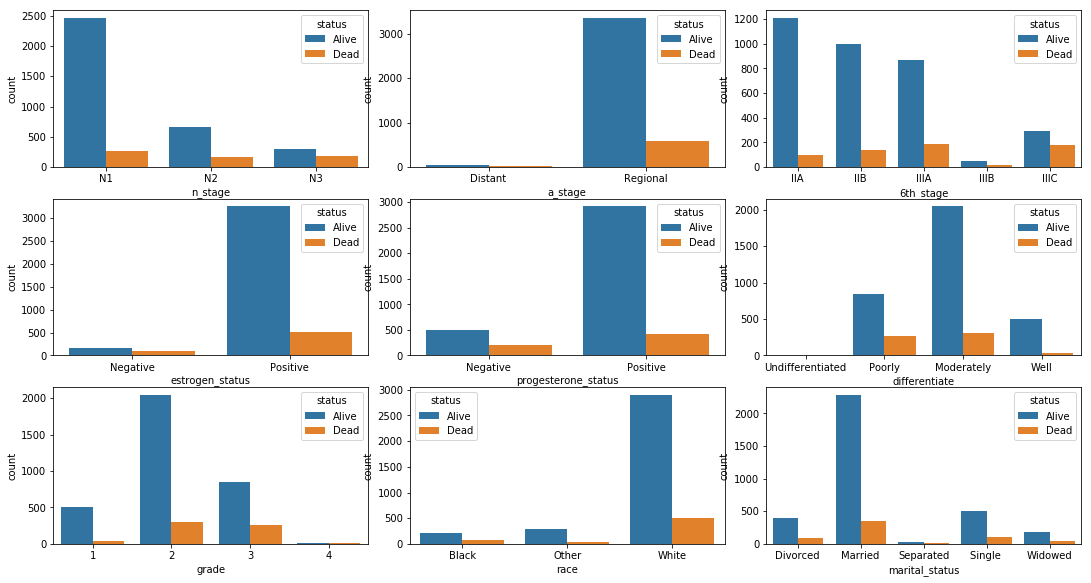

In [34]:
fig, axes = plt.subplots(3,3, figsize=[15,8])
fig.tight_layout()

draw_grouped_bar(3, 3, ['n_stage', 'a_stage', '6th_stage', 'estrogen_status', 'progesterone_status', 'differentiate', 'grade', 'race', 'marital_status'])

### Observations

Admittedly, we have drawn the relationships between the patient's status and all the other categorical variables, but we will focus on those that present interesting observations.

* `n_stage` : We observe that proportionally patients with N3_stage, (it means with a high degree of invasion for carcinogenic cells) are less likely to survive than if their cancer was at a lower stage(N1 or N2).
* `6th_stage` : We notice that proportionally patients with advanced stage for `6th_stage`(IIIC, IIIB, IIIA), are less likely to survive than if their cancer's 6th stage was at a lower stage(IIA? IIB).
* `differentiate` : Another observation we can make is that, proportionally patients with cells poorly differentiated are moss likely to die than if their cells are well or moderately differentiated.
* `grade` : Proportionally, patients die most when the carcinogenic cells is at advanced grade (grade 3 and 4)
* `race` : Breast cancer touch the most the white people but this observation could be biased considering that in this dataset, there is plenty enough white patients than anyelse one.
* Concerning `marital_status`, always proportionally, separated, widowed, single and divorced patients respectively are less likely to survive than married ones.

#### Before sum up our observations, let see the relation between some numerical variables and the most meaningful in terms of cancer stage categorical variables

The goal is to know how stage of cancer can influence on the `tumor_size` and `survival_months`

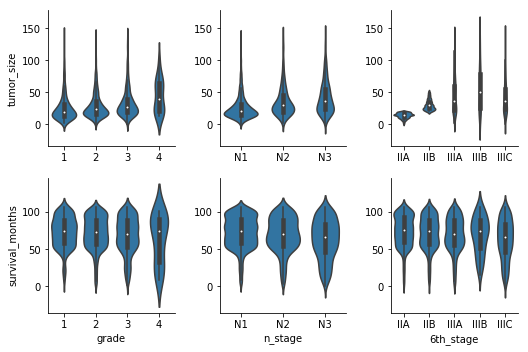

In [35]:
g = sb.PairGrid(data=breast_cancer_df, y_vars=['tumor_size', 'survival_months'], x_vars=['grade', 'n_stage', '6th_stage'])
g.map(sb.violinplot);

#### Observations

* `tumor_size`
    - We can observe and notice that tumor_size has almost the same size regardless of `grade` even if it seems to increase for grade 2. For grade 4, the midpoint seems to increase
    - As for `n_stage` variable, the size of tumor increases as the degree of invasion of the cancer cells is high.
    - It is the same observation we make about the `6th_stage`, with the midpoint of tumor_size increases as the 6th_stage is high, excepted for stage `IIIC` where the midpoint is below the others.

* `survival_months`
    - We can observe and notice that distribution of survival_months is almost the same regardless of `grade` even if it seems that the midpoint decrease as the grade is high and patients survive less (few months) for grade 3 and 4 . 
    - It is almost the same observation we make about the `6th_stage` and `n_stage` , with the midpoint of survival_months decreases as the stage is high, and the number of patients with few months of survival increases too.

### Talking about some of the relationships I observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We can observe that :
- Alive patients are approximately 32 years old to 69, their tumor_size is among the smallest and they survive during a long time at least around 50 months
- Dead patients are of all ages, their tumor_size is among the smallest too but not as Alive patients...almost the same range, and they survive not necessarly a long time before dying.

We can also observe that :
- Proportionally patients with N3_stage or an advanced stage for 6th_stage(IIIC, IIIB, IIIA) are less likely to survive than if their cancer was at the lower stage(N1 or N2) or (IIA or IIB).
- Always Proportionally patients with cells poorly differentiated or for which the carcinogenic cells is at advanced grade (grade 3 and 4) are moss likely to die than if their cells are well or moderately differentiated or if the carcinogenic cells is at a low grade( 1 or 2)
- Concerning marital_status, separated, widowed, single and divorced patients respectively are less likely to survive than married ones.

### Did I observe any interesting relationships between the other features (not the main feature(s) of interest)?

- These visualizations allow us to see that there is a weak correlation between numerical values. Specifically there is almost not relation between age and survival_months. It could be lead us to say that the number of months patients survive before healing or dying does not really depend of their age.

- We can observe and notice that tumor_size has almost the same size regardless of grade even if it seems to increase for grade 2 whereas for n_stage or 6th_stage variable, the size of tumor increase as the degree of stage is high. The tumor_size increase for grade 4 because the midpoint of the violin bar is above all the midpoint of the other violin bar

- We have also observed that generally for survival_months the midpoint decreases as the stage is high,

## Multivariate Exploration <a class="anchor" id="multi"></a>

#### Distribution of tumor_size, survival_months on status

The previous visualizations has showed a relation between `status` and each of the following variables : `age`, `tumor_size`, `survival_months`.

Indeed we plot chart between status and each of this variable, Let's now plot chart which will take into acccount all of them.
We will however intentionally omit age variable because firstly of course there is a relation between this variable and status : Alive people have a range of age between 32 and 69 but not for Dead people, there is no range...all ages are valid, i mean people of all age in this dataset are susceptible to die of breast cancer. Secondly, the correlation matrice has showed to us that there is no a relation between age and survival_months variable (There is one even if it is weak, between tumor_size and survival_months).

We will keep our previous conclusions concerning status and age variable and try to plot a chart to enhance the observation and to confirm our previous ones between **`status`, `tumor_size` and `survival_months`**.

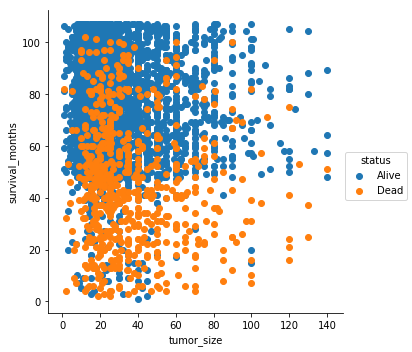

In [43]:
g = sb.FacetGrid(data=breast_cancer_df, hue='status', size=5)
g.map(plt.scatter, 'tumor_size', 'survival_months');
g.add_legend();

#### Observations

The plot confirm our previous observations : 
- Alive patients in this dataset have mostly, a relative small tumor_size , and survive many months around over 50 or 60
- Dead patients in this dataset have also a relative small size of tumor but seing the distribution(15% of Dead patients) and the number of points of dead patients which have a relative big tumor size, we could easily add that a big part of dead patients have relative big tumor size around 50 and 70mm.

#### Distribution of tumor_size, survival_months on some categorical variables in particularly stage variables, differentiate and grade

We will firstly plot chart with `tumor_size` and stage variables( `6th_stage`, `n_stage`) and the same for survival_months to try to enhance and confirm or infirm our previous observations

We will further our observations by trying to see the relationship between `tumor_size`, `survival_months` and `differentiate` and `grade` variables

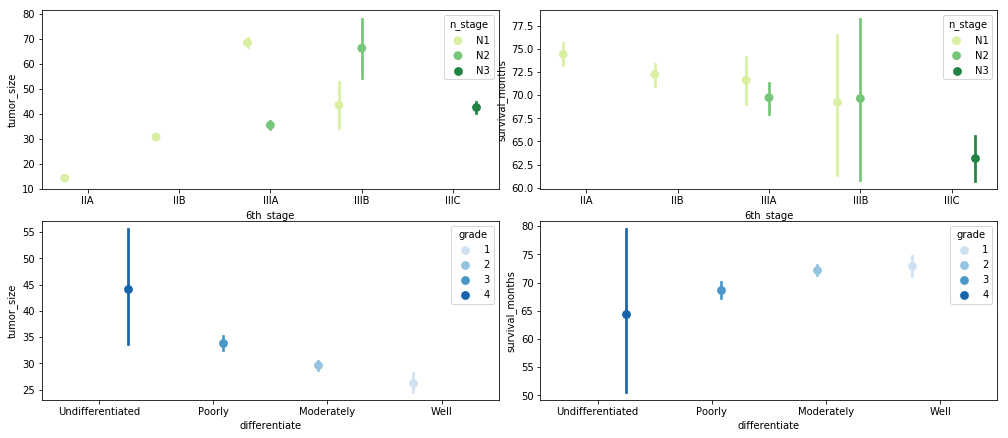

In [62]:
fig, axes = plt.subplots(2, 2, figsize = [14,6])
fig.tight_layout()

# Pointplot for tumor_size and survival_months vs stage variables
sb.pointplot(data = breast_cancer_df, x = '6th_stage', y = 'tumor_size', hue = 'n_stage', palette = 'YlGn', linestyles = '', dodge = 0.5, ax=axes[0,0]);
sb.pointplot(data = breast_cancer_df, x = '6th_stage', y = 'survival_months', hue = 'n_stage', palette = 'YlGn', linestyles = '', dodge = 0.5, ax=axes[0,1]);

# Pointplot for tumor_size and survival_months vs differentiate and grade variables
sb.pointplot(data = breast_cancer_df, x = 'differentiate', y = 'tumor_size', hue = 'grade', palette = 'Blues', linestyles = '', dodge = 0.5, ax=axes[1,0]);
sb.pointplot(data = breast_cancer_df, x = 'differentiate', y = 'survival_months', hue = 'grade', palette = 'Blues', linestyles = '', dodge = 0.5, ax=axes[1,1]);


- For tumor_size vs stage variables, the patients with a high stage of their cancer have the most big size of tumor (N2 and IIIB for around 55 to 76mm tumor_size)
- As for survival_months vs stage variables, the patients with a high stage(N3 and IIIC, N2 and IIIB) of their cancer have the less number of survival months.


- For tumor_size  vs differentiate and grade variables, the patients with a high stage and undifferentiated cells have the biggest size of tumor (from 35mm to 55mm)
- As for survival_months vs differentiate and grade variables, the patients with a high stage and undifferentiated cells have the shortest time to survive. But they also have the longest time of survival.

In [68]:
'''
            Draw scatter plots between 4 variables (2 categorical and 2 numerical)

            Parameters:
                    cat_var (str) : column which represent the second categorical variable

            Returns:
                    scatter plot
'''

def draw_multi_scatter_plot(cat_var):
    g = sb.FacetGrid(data=breast_cancer_df, row='status', col=cat_var, size=3)
    g.map(plt.scatter, 'tumor_size', 'survival_months');
    g.add_legend();

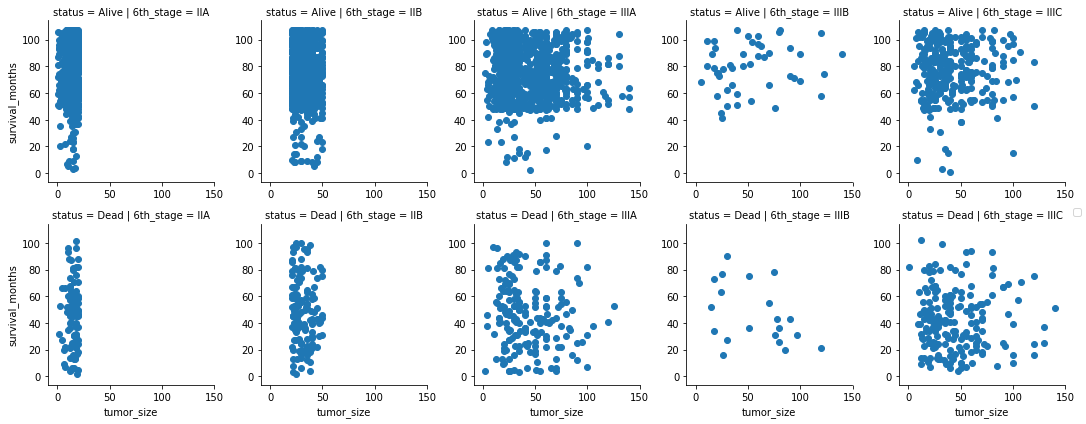

In [69]:
# tumor_size and survival_months vs status and 6th_stage
draw_multi_scatter_plot('6th_stage')

### Observation

The most the stage is high, the less patients are likely to survive. The survival_months does not influence really here. However, the tumor_size increases as the stage is high

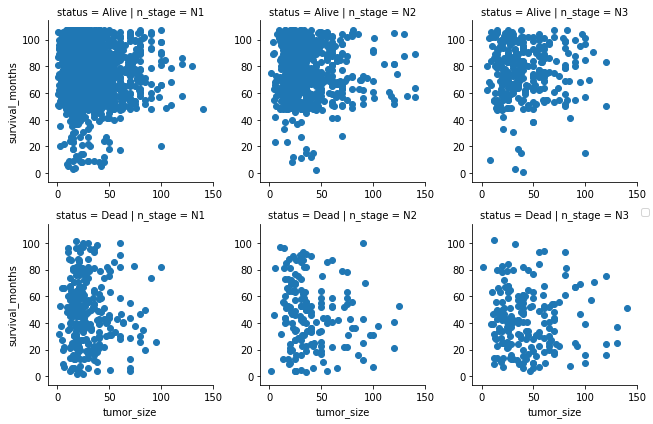

In [70]:
# tumor_size and survival_months vs status and n_stage
draw_multi_scatter_plot('n_stage')

### Observation

The most the n_stage is high, the less patients are likely to survive. The tumor_size here too, increases as the stage is high.

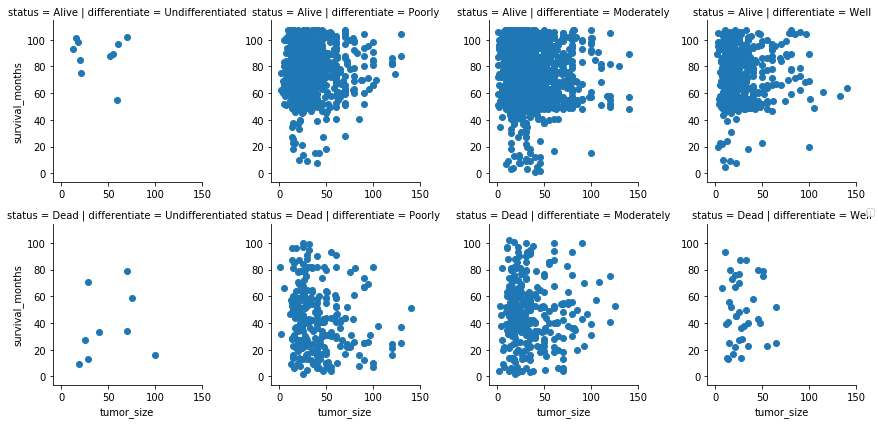

In [71]:
# tumor_size and survival_months vs status and differentiate
draw_multi_scatter_plot('differentiate')

### Observation

Patients with undifferentiated and poorly differentiated cells have a relative big size of tumors and are less likely to survive than those who have well differentiated cells.

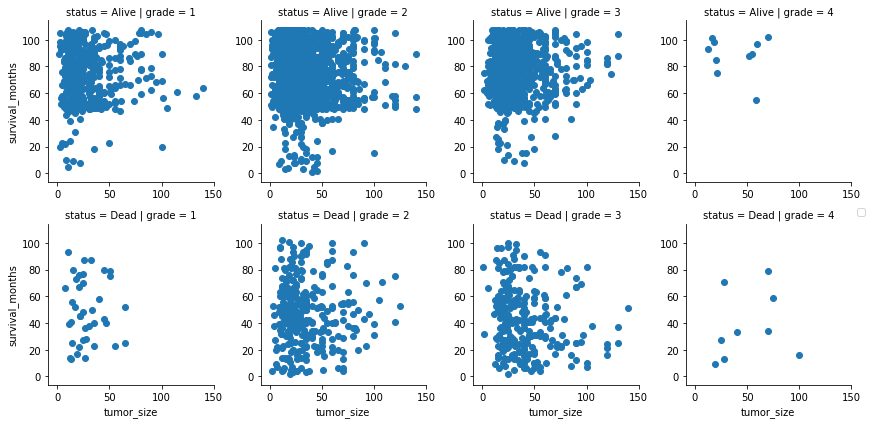

In [72]:
# tumor_size and survival_months vs status and grade
draw_multi_scatter_plot('grade')

### Observation

The most the grade is high (from garde 3), the less patients are likely to survive than the other grades. The tumor_size increases too as the grade is high

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The relationships i observe in this section :
* Alive patients have a relative small tumor_size and mostly, survive many months around over 50 or 60
* Dead patients have also a relative small size of tumor but seing the distribution, we could easily add that a big part of dead patients have relative big tumor size around 50 and 70mm.


These visualizations confirm the observations I have made in the bivariate visualization about the relation between `tumor_size` and stage variable (`n_stage`, `6th_stage`) and also `grade` variable : 
*The tumor_size increases as the stage or grade is high.

### Were there any interesting or surprising interactions between features?

Plot between tumor_size and stage variables firstly and grade and differentiate variables on the other hand allow us to confirm our previous observations and was very interesting to observe when I add status variable to the plot. 

## Conclusions <a class="anchor" id="end"></a>

##### Univariate visualization
* Shows that in this dataset, 85% of patients are Alive whereas around 15% are Dead.
* Shows the distribution of some interesting variables like tumor_size, stage variables, grade, ...

##### Bivariate supported by Multivariate visualization
* Alive patients are approximately 32 years old to 69, their tumor_size is among the smallest and they survive during a long time at least around over 50 or 60 months
* Dead patients are of all ages, their tumor_size is among the smallest too but not as Alive patients... seing the distribution, we could easily add that a big part of dead patients have relative big tumor size around 50 and 70mm. They survive not necessarly a long time before dying.
* Proportionally patients with N3_stage or an advanced stage for 6th_stage(IIIC, IIIB, IIIA) are less likely to survive than if their cancer was at the lower stage(N1 or N2) or (IIA or IIB).
* Always Proportionally patients with poorly differentiated or undifferentiated cells or for which the carcinogenic cells is at advanced grade (grade 3 and 4) are moss likely to die than if their cells were well differentiated or if the carcinogenic cells is at a low grade( 1 or 2)
* Concerning marital_status, separated, widowed, single and divorced patients respectively are less likely to survive than married ones.
* The tumor_size increases as the stage or grade is high.